# Data Analysis on CarSales

## Hypothesis: Red cars have a higher average sales price than cars of other colors. 
### The body type of a car has a high correlation with Average MPG , transmission type and engine size. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import seaborn as sns
plt.style.use('seaborn')

In [2]:
df_datadive=pd.read_csv('data/CarSales_DataDive.csv', index_col=0, header=0)

C:\Users\mrsmo\AppData\Local\Temp\ipykernel_3312\737974267.py:1: DtypeWarning: Columns (1,2,3,10,11,12,13,14,15,17,18,22,23,26,27,30,31,35,38,41,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df_datadive=pd.read_csv('data/CarSales_DataDive.csv', index_col=0, header=0)


### Dropping Columns

In [3]:
df_datadive=df_datadive.drop(df_datadive.index[206241:215648])

In [4]:
df_datadive=df_datadive.drop(columns=['bed', 'combine_fuel_economy', 'exterior_color', 'length', 'vehicle_damage_category', 'latitude', 'longitude', 'listing_id', 'main_picture_url', 'height', 'width', 'front_legroom', 'dealer_zip', 'engine_displacement', 'engine_type', 'listed_date','theft_title', 'franchise_make','interior_color', 'fuel_tank_volume'])

### Fill NaN 

In [5]:
df_datadive['city_fuel_economy']=df_datadive['city_fuel_economy'].fillna(df_datadive['city_fuel_economy'].mean())
df_datadive['highway_fuel_economy']=df_datadive['highway_fuel_economy'].fillna(df_datadive['highway_fuel_economy'].mean())
df_datadive['wheelbase']=df_datadive['wheelbase'].fillna(df_datadive['wheelbase'].mean())
df_datadive['owner_count']=df_datadive['owner_count'].fillna(0)
df_datadive['frame_damaged']=df_datadive['frame_damaged'].fillna('Unknown')
df_datadive['has_accidents']=df_datadive['has_accidents'].fillna('Unknown')
df_datadive['salvage']=df_datadive['salvage'].fillna('Unknown')
df_datadive['torque']=df_datadive['torque'].fillna(df_datadive['torque'].median())
df_datadive['body_type']=df_datadive['body_type'].fillna('Other')
df_datadive['engine_cylinders']=df_datadive['engine_cylinders'].fillna('Other')
df_datadive['fuel_type']=df_datadive['fuel_type'].fillna('Other')
df_datadive['horsepower']=df_datadive['horsepower'].fillna(df_datadive['horsepower'].median())
df_datadive['maximum_seating']=df_datadive['maximum_seating'].fillna('Other')
df_datadive['mileage']=df_datadive['mileage'].fillna(df_datadive['mileage'].mean())
df_datadive['seller_rating']=df_datadive['seller_rating'].fillna(df_datadive['seller_rating'].mean())
df_datadive['transmission_display']=df_datadive['transmission_display'].fillna('Other')
df_datadive['wheel_system_display']=df_datadive['wheel_system_display'].fillna('Other')
df_datadive['major_options']=df_datadive['major_options'].fillna('Standard')


df_datadive.sample(20)

,city,body_type,city_fuel_economy,daysonmarket,engine_cylinders,frame_damaged,franchise_dealer,fuel_type,has_accidents,highway_fuel_economy,...,owner_count,price,salvage,savings_amount,seller_rating,torque,transmission_display,wheel_system_display,wheelbase,year
307091,Louisville,Coupe,22.906236,21.0,8.0,False,True,Gasoline,False,29.817872,...,0.0,78715.0,False,0.0,4.437500,258.0,Manual,Other,114.57791,2020.0
330467,Raleigh,SUV / Crossover,18.000000,188.0,6.0,Unknown,True,Gasoline,Unknown,25.000000,...,0.0,44051.0,Unknown,0.0,4.218750,260.0,Automatic,Four-Wheel Drive,114.70000,2020.0
52739,San Antonio,SUV / Crossover,27.000000,92.0,3.0,Unknown,True,Gasoline,Unknown,29.000000,...,0.0,22190.0,Unknown,0.0,3.583333,125.0,Automatic,Front-Wheel Drive,99.20000,2020.0
298520,Oklahoma City,Pickup Truck,22.906236,6.0,8.0,False,True,Biodiesel,False,29.817872,...,1.0,70445.0,False,1398.0,4.441176,935.0,6-Speed Automatic,Four-Wheel Drive,176.00000,2019.0
247319,Cincinnati,Sedan,29.000000,64.0,4.0,Unknown,True,Gasoline,Unknown,36.000000,...,0.0,21776.0,Unknown,0.0,4.258621,184.0,Automatic,Front-Wheel Drive,111.40000,2020.0
98249,Miami,Sedan,21.000000,20.0,6.0,False,True,Gasoline,False,31.000000,...,1.0,15699.0,False,1176.0,4.304348,248.0,6-Speed Automatic,Front-Wheel Drive,111.00000,2016.0
170564,Dallas,Sedan,19.000000,50.0,6.0,False,False,Gasoline,True,27.000000,...,3.0,8991.0,False,1524.0,4.476923,254.0,Automatic,Front-Wheel Drive,109.30000,2010.0
62550,San Antonio,SUV / Crossover,22.000000,82.0,4.0,Unknown,True,Gasoline,Unknown,29.000000,...,0.0,39178.0,Unknown,0.0,4.900000,275.0,Automatic,Front-Wheel Drive,106.70000,2020.0
72880,Columbus,Sedan,22.906236,4.0,Other,Unknown,True,Other,Unknown,29.817872,...,0.0,29170.0,Unknown,0.0,4.352941,258.0,Automatic,Other,114.57791,2021.0
302678,Oklahoma City,Sedan,27.000000,10.0,4.0,False,True,Diesel,False,46.000000,...,1.0,10310.0,False,8.0,4.351351,264.0,Automatic,Front-Wheel Drive,105.70000,2014.0


In [6]:
df_datadive.dropna(axis = 0, how = 'all', inplace = True)

In [7]:
df_datadive = df_datadive[df_datadive['city'].notna()]

In [8]:
df_datadive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206239 entries, 273335 to 52208
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   city                  206239 non-null  object 
 1   body_type             206239 non-null  object 
 2   city_fuel_economy     206239 non-null  float64
 3   daysonmarket          206239 non-null  float64
 4   engine_cylinders      206239 non-null  object 
 5   frame_damaged         206239 non-null  object 
 6   franchise_dealer      206239 non-null  object 
 7   fuel_type             206239 non-null  object 
 8   has_accidents         206239 non-null  object 
 9   highway_fuel_economy  206239 non-null  float64
 10  horsepower            206239 non-null  float64
 11  is_new                206239 non-null  object 
 12  listing_color         206239 non-null  object 
 13  major_options         206239 non-null  object 
 14  make                  206239 non-null  object 
 

Text(0, 0.5, 'Listing Color')

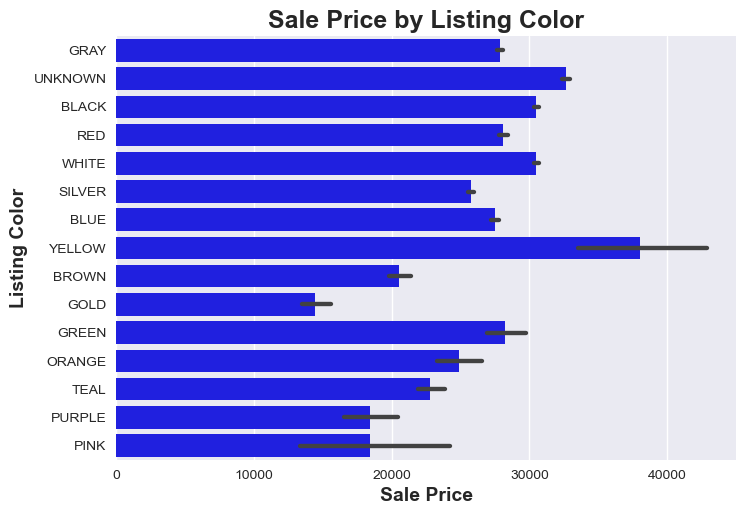

In [9]:
sns.barplot(data=df_datadive, x = 'price', y = "listing_color", color = 'b')
plt.title('Sale Price by Listing Color', fontweight='bold', fontsize = '18', horizontalalignment='center')
plt.xlabel('Sale Price', fontweight='bold', fontsize = '14', horizontalalignment='center')
plt.ylabel('Listing Color', fontweight='bold', fontsize = '14', horizontalalignment='center')

### Barplot Summary

#### The listing sale price varies more among cars listed as pink or yellow compared to other colors. The average sale price of yellow, black, and green cars have a tendency to be higher than other colors. 

## Count of Color by Make

In [43]:
# Extract the unique car makes
car_makes = df_datadive['make'].unique()

# Create a Dictionary to Store the colors
car_colors = {}

#Loop through each car make and extract it's associated colors
for make in car_makes:
    colors= df_datadive[df_datadive['make']==make]['listing_color'].unique()
    car_colors[make] = list(colors)
#Print out the number of cars for each make
print('Number of cars by make:')
print(df_datadive['make'].value_counts())

#Print out the number of cars for each color
print('Number of cars by color:')
print(df_datadive['listing_color'].value_counts())

#Print out the car makes and their associated colors
print('COlors by make:')
for make, colors in car_colors.items():
    print(make)
    for color in colors:
        print(f"\t-{color}")

Number of cars by make:
Ford             31569
Chevrolet        26399
Toyota           16188
Nissan           15698
Honda            13977
Jeep              9850
Hyundai           9383
Kia               7924
Volkswagen        6570
Dodge             6171
GMC               5624
RAM               5488
BMW               4682
Mazda             4667
Mercedes-Benz     3882
Subaru            3554
Buick             3528
Lexus             2950
INFINITI          2784
Cadillac          2755
Acura             2527
Chrysler          2382
Audi              2368
Lincoln           1918
Volvo             1785
Mitsubishi        1642
Land Rover        1057
MINI               853
Jaguar             689
Porsche            660
Alfa Romeo         522
Genesis            359
FIAT               322
Maserati           232
Scion              219
Tesla              194
Pontiac            169
Mercury            109
Saturn              88
Hummer              86
smart               39
Suzuki              31
Bentley   

## Summary of Value Counts

When looking at our bar plot we see the average sales price of yellow cars are higher the rest, our value counts hint that this is possible because exotic car manufacturers are more likely to have a car in yellow than the other car manufacturers. 

### Scatterplot for Sale Price and Year

<AxesSubplot:xlabel='year', ylabel='price'>

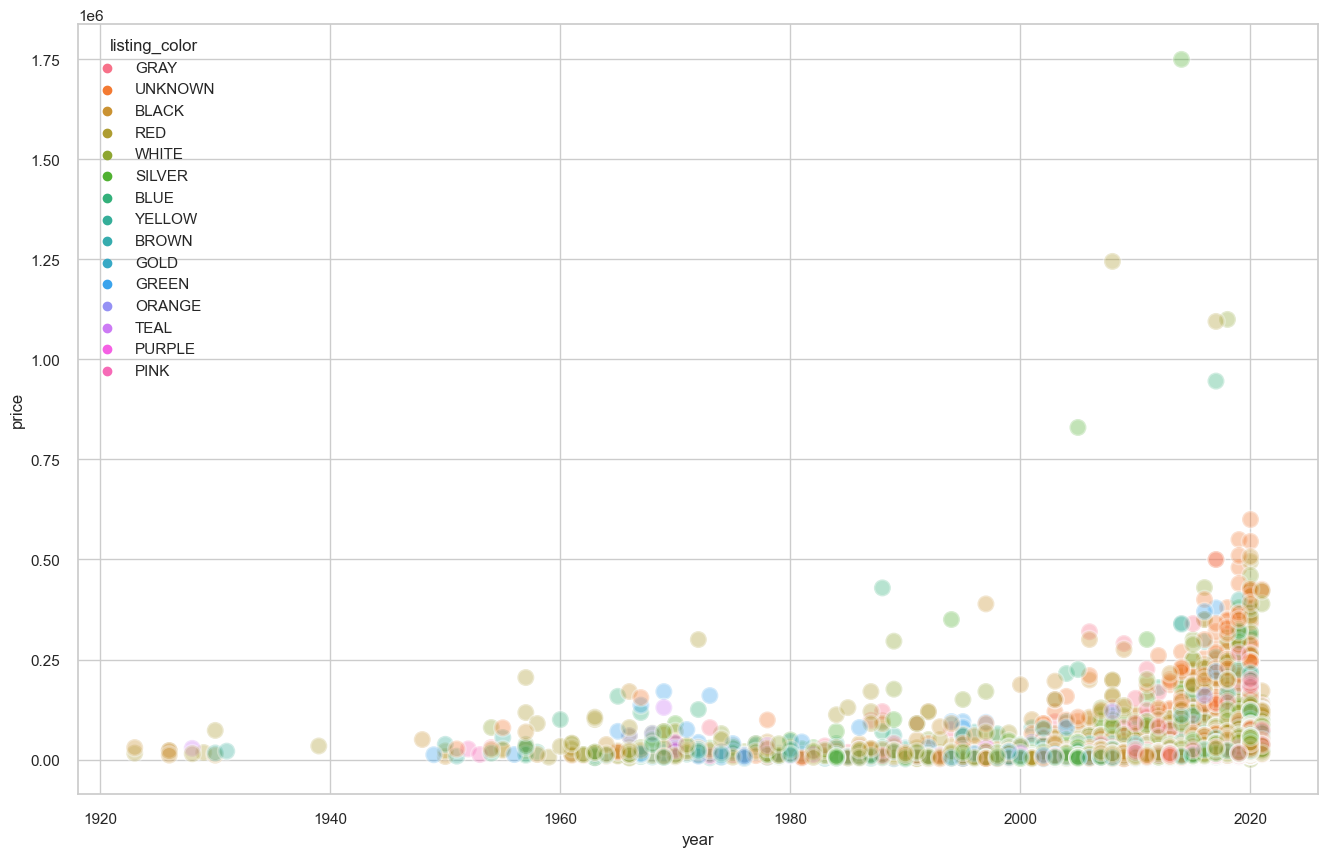

In [10]:
sns.set(style='whitegrid')
plt.figure(figsize=(16,10))
sns.scatterplot(y='price', x = 'year', hue = 'listing_color', data = df_datadive, alpha = .35, s = 150, edgecolor='white', linewidth = 2)

### Create New Feature Variables

In [11]:
df_datadive['feature_count']= df_datadive['major_options'].str.count(',')+1
df_datadive['Average_MPG']= (df_datadive['city_fuel_economy'] + df_datadive['highway_fuel_economy'])/2

In [12]:
df_datadive=df_datadive.drop(columns=['city_fuel_economy', 'highway_fuel_economy' ])

### Combine values with different spellings

In [13]:
df_datadive['make']=df_datadive['make'].replace(['ford', 'chevrolet'], ['Ford', 'Chevrolet'])

In [14]:
df_datadive=df_datadive.rename(columns={'price':'Sale_Price', 'daysonmarket': 'days_on_market'})

### Label Encoding for feature variables with true/false values

In [15]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

In [16]:
df_datadive['salvage'].value_counts()

False      109952
Unknown     94941
True         1346
Name: salvage, dtype: int64

In [17]:
df_datadive['is_new']=lc.fit_transform(df_datadive['is_new'])
df_datadive['franchise_dealer']=lc.fit_transform(df_datadive['franchise_dealer'])

### One-hot encoding 

In [18]:
dummies_city=pd.get_dummies(df_datadive['city'], drop_first = False, prefix='c', dtype='int')

In [19]:
dummies_bt=pd.get_dummies(df_datadive['body_type'], drop_first = False, prefix='bt', dtype='int')

In [20]:
dummies_ec=pd.get_dummies(df_datadive['engine_cylinders'], drop_first = False, prefix='ec', dtype='int')
dummies_fd=pd.get_dummies(df_datadive['frame_damaged'], drop_first = False, prefix='fd', dtype='int')
dummies_ft=pd.get_dummies(df_datadive['fuel_type'], drop_first = False, prefix='ft', dtype='int')
dummies_ha=pd.get_dummies(df_datadive['has_accidents'], drop_first = False, prefix='ha', dtype='int')
dummies_lc=pd.get_dummies(df_datadive['listing_color'], drop_first = False, prefix='lc', dtype='int')
dummies_mk=pd.get_dummies(df_datadive['make'], drop_first = False, prefix='mk', dtype='int')
dummies_ms=pd.get_dummies(df_datadive['maximum_seating'], drop_first = False, prefix='ms', dtype='int')
dummies_md=pd.get_dummies(df_datadive['model'], drop_first = False, prefix='md', dtype='int')
dummies_s=pd.get_dummies(df_datadive['salvage'], drop_first = False, prefix='s', dtype='int')
dummies_td=pd.get_dummies(df_datadive['transmission_display'], drop_first = False, prefix='td', dtype='int')
dummies_wsd=pd.get_dummies(df_datadive['wheel_system_display'], drop_first = False, prefix='wsd', dtype='int')

In [21]:
dummies_mk=dummies_mk.drop(['mk_Ford'], axis = 1)
dummies_city=dummies_city.drop(['c_Houston'], axis = 1)
dummies_bt=dummies_bt.drop(['bt_SUV / Crossover'], axis = 1)
dummies_ec=dummies_ec.drop(['ec_4.0'], axis = 1)
dummies_fd=dummies_fd.drop(['fd_False'], axis = 1)
dummies_ft=dummies_ft.drop(['ft_Gasoline'], axis = 1)
dummies_ha=dummies_ha.drop(['ha_Unknown'], axis = 1)
dummies_lc=dummies_lc.drop(['lc_WHITE'], axis = 1)
dummies_ms=dummies_ms.drop(['ms_5.0'], axis = 1)
dummies_s=dummies_s.drop(['s_False'], axis = 1)
dummies_td=dummies_td.drop(['td_Automatic'], axis = 1)

In [22]:
df_datadive=pd.concat([df_datadive, dummies_mk, dummies_city, dummies_bt, dummies_ec, dummies_fd, dummies_ft, dummies_ha, dummies_lc, dummies_ms, dummies_s, dummies_td], axis=1)

### Multiple Regression

### Regression for Color by itself

In [23]:
X=df_datadive[['lc_BLACK', 'lc_BLUE', 'lc_BROWN', 'lc_GOLD', 'lc_GRAY', 'lc_GREEN', 'lc_ORANGE', 'lc_PINK', 'lc_PURPLE', 'lc_RED', 'lc_SILVER', 'lc_TEAL', 'lc_UNKNOWN']]

y = df_datadive['Sale_Price']

In [24]:
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()

pred= reg.predict(X)
resid = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     226.3
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:33:28   Log-Likelihood:            -2.3418e+06
No. Observations:              206239   AIC:                         4.684e+06
Df Residuals:                  206225   BIC:                         4.684e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.057e+04     96.035    318.355      0.000    3.04e+04    3.08e+04
lc_BLACK     -75.7532    140.461     -0.539      0.590    -351.053     199.547
lc_BLUE    -3058.1069    186.432    -16.403      0.000   -3423.509   -2692.705
lc_BROWN   -1.001e+04    523.536    -19.122      0.000    -1.1e+04   -8984.768
lc_GOLD    -1.613e+04    728.165    -22.154      0.000   -1.76e+04   -1.47e+04
lc_GRAY    -2689.8711    158.094    -17.014      0.000   -2999.732   -2380.010
lc_GREEN   -2352.2012    541.757     -4.342      0.000   -3414.031   -1290.371
lc_ORANGE  -5680.9405    745.369     -7.622      0.000   -7141.845   -4220.036
lc_PINK    -1.215e+04   6532.938     -1.860      0.063    -2.5e+04     650.311
lc_PURPLE  -1.215e+04   1896.033     -6.406      0.000   -1.59e+04   -8430.285
lc_RED     -2488.0220    186.510    -13.340      0.000   -2853.577   -2122.467
lc_SILVER  -4832.4793    157.830    -30.618      0.000   -5141.822   -4523.136
lc_TEAL    -7760.2152   1137.746     -6.821      0.000   -9990.169   -5530.261
lc_UNKNOWN  2078.4613    159.084     13.065      0.000    1766.661    2390.262
==============================================================================
Omnibus:                   334899.925   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1699888428.635
Skew:                           9.961   Prob(JB):                         0.00
Kurtosis:                     447.318   Cond. No.                         151.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regression With Multiple Features

In [25]:
X=df_datadive[['days_on_market', 'horsepower', 'mileage', 'owner_count', 'savings_amount', 'seller_rating', 'torque', 'wheelbase', 'year', 'feature_count', 'Average_MPG', 'mk_AM General', 'mk_AMC', 'mk_Acura', 'mk_Alfa Romeo', 'mk_Aston Martin', 'mk_Audi', 'mk_BMW', 'mk_Bentley', 'mk_Bugatti', 'mk_Buick', 'mk_Cadillac', 'mk_Chevrolet', 'mk_Chrysler', 'mk_Datsun', 'mk_DeTomaso', 'mk_Dodge', 'mk_Edsel', 'mk_FIAT', 'mk_Ferrari', 'mk_Fisker', 'mk_Freightliner', 'mk_GMC', 'mk_Genesis', 'mk_Honda', 'mk_Hummer', 'mk_Hyundai', 'mk_INFINITI', 'mk_Isuzu', 'mk_Jaguar', 'mk_Jeep', 'mk_Karma', 'mk_Kia', 'mk_Lamborghini', 'mk_Land Rover', 'mk_Lexus', 'mk_Lincoln', 'mk_Lotus', 'mk_MG', 'mk_MINI', 'mk_Maserati', 'mk_Mazda', 'mk_McLaren', 'mk_Mercedes-Benz', 'mk_Mercury', 'mk_Mitsubishi', 'mk_Nash', 'mk_Nissan', 'mk_Oldsmobile', 'mk_Pininfarina', 'mk_Plymouth', 'mk_Pontiac', 'mk_Porsche', 'mk_RAM', 'mk_Rolls-Royce', 'mk_SRT', 'mk_Saab', 'mk_Saturn', 'mk_Scion', 'mk_Shelby', 'mk_Subaru', 'mk_Sunbeam', 'mk_Suzuki', 'mk_Tesla', 'mk_Toyota', 'mk_Triumph', 'mk_Volkswagen', 'mk_Volvo', 'mk_Willys', 'mk_smart',  'c_Albuquerque', 'c_Arlington', 'c_Austin', 'c_Charlotte', 'c_Chicago', 'c_Cincinnati', 'c_Columbia', 'c_Columbus', 'c_Dallas', 'c_Denver', 'c_El Paso', 'c_Indianapolis', 'c_Jacksonville', 'c_Las Vegas', 'c_Louisville', 'c_Madison', 'c_Miami', 'c_Oklahoma City', 'c_Orlando', 'c_Phoenix', 'c_Raleigh', 'c_Richmond', 'c_San Antonio', 'c_San Jose', 'c_Scottsdale', 'c_Springfield', 'c_Stafford', 'c_Tampa', 'c_Tucson', 'bt_Convertible', 'bt_Coupe', 'bt_Hatchback', 'bt_Minivan', 'bt_Other', 'bt_Pickup Truck', 'bt_Sedan', 'bt_Van', 'bt_Wagon', 'ec_2.0', 'ec_3.0', 'ec_5.0', 'ec_6.0', 'ec_8.0', 'ec_10.0', 'ec_12.0', 'ec_16.0', 'ec_Other', 'fd_True', 'fd_Unknown', 'ft_Biodiesel', 'ft_Compressed Natural Gas', 'ft_Diesel', 'ft_Electric', 'ft_Flex Fuel Vehicle', 'ft_Hybrid', 'ft_Other', 'ha_False', 'ha_True', 'lc_BLACK', 'lc_BLUE', 'lc_BROWN', 'lc_GOLD', 'lc_GRAY', 'lc_GREEN', 'lc_ORANGE', 'lc_PINK', 'lc_PURPLE', 'lc_RED', 'lc_SILVER', 'lc_TEAL', 'lc_UNKNOWN', 'lc_YELLOW', 'ms_2.0', 'ms_3.0', 'ms_4.0', 'ms_6.0', 'ms_7.0', 'ms_8.0', 'ms_9.0', 'ms_10.0', 'ms_12.0', 'ms_15.0', 'ms_Other', 's_True', 's_Unknown', 'td_1-Speed Automatic', 'td_1-Speed CVT', 'td_1-Speed Dual Clutch', 'td_10-Speed Automatic', 'td_2-Speed Automatic', 'td_3-Speed Automatic', 'td_3-Speed Manual', 'td_4-Speed Automatic', 'td_4-Speed Automatic Overdrive', 'td_4-Speed Manual', 'td_5-Speed Automatic', 'td_5-Speed Automatic Overdrive', 'td_5-Speed Manual', 'td_5-Speed Manual Overdrive', 'td_6-Speed Automatic', 'td_6-Speed Automatic Overdrive', 'td_6-Speed CVT', 'td_6-Speed Dual Clutch', 'td_6-Speed Manual', 'td_6-Speed Manual Overdrive', 'td_7-Speed Automatic', 'td_7-Speed Automatic Overdrive', 'td_7-Speed CVT', 'td_7-Speed Dual Clutch', 'td_7-Speed Manual', 'td_8-Speed Automatic', 'td_8-Speed Automatic Overdrive', 'td_8-Speed CVT', 'td_8-Speed Dual Clutch', 'td_8-Speed Manual', 'td_9-Speed Automatic', 'td_9-Speed Automatic Overdrive', 'td_9-Speed Dual Clutch', 'td_Continuously Variable Transmission', 'td_Manual', 'td_Other']]

y= df_datadive['Sale_Price']

In [26]:
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()

pred= reg.predict(X)
resid = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     2544.
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:33:32   Log-Likelihood:            -2.2157e+06
No. Observations:              206239   AIC:                         4.432e+06
Df Residuals:                  206040   BIC:                         4.434e+06
Df Model:                         198                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  -1.44e+06   1.38e+04   -104.066      0.000   -1.47e+06   -1.41e+06
days_on_market                            4.7776      0.245     19.502      0.000       4.297       5.258
horsepower                               98.4628      0.829    118.757      0.000      96.838     100.088
mileage                                  -0.0010      0.000     -9.312      0.000      -0.001      -0.001
owner_count                           -2555.7588     39.540    -64.638      0.000   -2633.256   -2478.262
savings_amount                            0.7313      0.025     28.754      0.000       0.681       0.781
seller_rating                          1431.5725     51.995     27.533      0.000    1329.664    1533.481
torque                                    8.0526      0.504     15.968      0.000       7.064       9.041
wheelbase                                40.0462      5.702      7.023      0.000      28.871      51.222
year                                    993.3264      9.614    103.322      0.000     974.483    1012.169
feature_count                           334.1331      7.928     42.148      0.000     318.595     349.671
Average_MPG                              22.1019      7.238      3.054      0.002       7.916      36.288
mk_AM General                          4.019e+04   8031.944      5.004      0.000    2.44e+04    5.59e+04
mk_AMC                                 3.277e+04   1.12e+04      2.919      0.004    1.08e+04    5.48e+04
mk_Acura                               5009.7008    249.044     20.116      0.000    4521.580    5497.822
mk_Alfa Romeo                          3405.5054    500.033      6.811      0.000    2425.453    4385.558
mk_Aston Martin                         8.71e+04   1774.550     49.084      0.000    8.36e+04    9.06e+04
mk_Audi                                 1.22e+04    242.230     50.367      0.000    1.17e+04    1.27e+04
mk_BMW                                 1.044e+04    182.048     57.320      0.000    1.01e+04    1.08e+04
mk_Bentley                             4.626e+04   1210.652     38.212      0.000    4.39e+04    4.86e+04
mk_Bugatti                             5.803e+05   5618.322    103.294      0.000    5.69e+05    5.91e+05
mk_Buick                                109.1612    209.002      0.522      0.601    -300.478     518.800
mk_Cadillac                            5574.4628    225.004     24.775      0.000    5133.461    6015.465
mk_Chevrolet                           -161.1594    101.445     -1.589      0.112    -359.990      37.671
mk_Chrysler                           -2138.8344    263.776     -8.109      0.000   -2655.829   -1621.840
mk_Datsun                              3.107e+04   8137.869      3.818      0.000    1.51e+04     4.7e+04
mk_DeToma

## Regression Summary

After running a multiple regression model on the dataset, an r-squared value of .71 was computed. The relationship between the target and features is somewhat strong but could be futher improved by removing additional features. There are several coefficients in the model with high p-values higher than the assumed confidence level of .05. Many of the high p-values are from the transmission display dummy variables.

## Regression Removing Transmission Display

In [27]:
X1=df_datadive[['days_on_market', 'horsepower', 'mileage', 'owner_count', 'savings_amount', 'seller_rating', 'torque', 'wheelbase', 'year', 'feature_count', 'Average_MPG', 'mk_AM General', 'mk_AMC', 'mk_Acura', 'mk_Alfa Romeo', 'mk_Aston Martin', 'mk_Audi', 'mk_BMW', 'mk_Bentley', 'mk_Bugatti', 'mk_Buick', 'mk_Cadillac', 'mk_Chevrolet', 'mk_Chrysler', 'mk_Datsun', 'mk_DeTomaso', 'mk_Dodge', 'mk_Edsel', 'mk_FIAT', 'mk_Ferrari', 'mk_Fisker', 'mk_Freightliner', 'mk_GMC', 'mk_Genesis', 'mk_Honda', 'mk_Hummer', 'mk_Hyundai', 'mk_INFINITI', 'mk_Isuzu', 'mk_Jaguar', 'mk_Jeep', 'mk_Karma', 'mk_Kia', 'mk_Lamborghini', 'mk_Land Rover', 'mk_Lexus', 'mk_Lincoln', 'mk_Lotus', 'mk_MG', 'mk_MINI', 'mk_Maserati', 'mk_Mazda', 'mk_McLaren', 'mk_Mercedes-Benz', 'mk_Mercury', 'mk_Mitsubishi', 'mk_Nash', 'mk_Nissan', 'mk_Oldsmobile', 'mk_Pininfarina', 'mk_Plymouth', 'mk_Pontiac', 'mk_Porsche', 'mk_RAM', 'mk_Rolls-Royce', 'mk_SRT', 'mk_Saab', 'mk_Saturn', 'mk_Scion', 'mk_Shelby', 'mk_Subaru', 'mk_Sunbeam', 'mk_Suzuki', 'mk_Tesla', 'mk_Toyota', 'mk_Triumph', 'mk_Volkswagen', 'mk_Volvo', 'mk_Willys', 'mk_smart', 'mk_AM General', 'mk_AMC', 'mk_Acura', 'mk_Alfa Romeo', 'mk_Aston Martin', 'mk_Audi', 'mk_BMW', 'mk_Bentley', 'mk_Bugatti', 'mk_Buick', 'mk_Cadillac', 'mk_Chevrolet', 'mk_Chrysler', 'mk_Datsun', 'mk_DeTomaso', 'mk_Dodge', 'mk_Edsel', 'mk_FIAT', 'mk_Ferrari', 'mk_Fisker', 'mk_Freightliner', 'mk_GMC', 'mk_Genesis', 'mk_Honda', 'mk_Hummer', 'mk_Hyundai', 'mk_INFINITI', 'mk_Isuzu', 'mk_Jaguar', 'mk_Jeep', 'mk_Karma', 'mk_Kia', 'mk_Lamborghini', 'mk_Land Rover', 'mk_Lexus', 'mk_Lincoln', 'mk_Lotus', 'mk_MG', 'mk_MINI', 'mk_Maserati', 'mk_Mazda', 'mk_McLaren', 'mk_Mercedes-Benz', 'mk_Mercury', 'mk_Mitsubishi', 'mk_Nash', 'mk_Nissan', 'mk_Oldsmobile', 'mk_Pininfarina', 'mk_Plymouth', 'mk_Pontiac', 'mk_Porsche', 'mk_RAM', 'mk_Rolls-Royce', 'mk_SRT', 'mk_Saab', 'mk_Saturn', 'mk_Scion', 'mk_Shelby', 'mk_Subaru', 'mk_Sunbeam', 'mk_Suzuki', 'mk_Tesla', 'mk_Toyota', 'mk_Triumph', 'mk_Volkswagen', 'mk_Volvo', 'mk_Willys', 'mk_smart', 'c_Albuquerque', 'c_Arlington', 'c_Austin', 'c_Charlotte', 'c_Chicago', 'c_Cincinnati', 'c_Columbia', 'c_Columbus', 'c_Dallas', 'c_Denver', 'c_El Paso', 'c_Indianapolis', 'c_Jacksonville', 'c_Las Vegas', 'c_Louisville', 'c_Madison', 'c_Miami', 'c_Oklahoma City', 'c_Orlando', 'c_Phoenix', 'c_Raleigh', 'c_Richmond', 'c_San Antonio', 'c_San Jose', 'c_Scottsdale', 'c_Springfield', 'c_Stafford', 'c_Tampa', 'c_Tucson', 'bt_Convertible', 'bt_Coupe', 'bt_Hatchback', 'bt_Minivan', 'bt_Other', 'bt_Pickup Truck', 'bt_Sedan', 'bt_Van', 'bt_Wagon', 'ec_2.0', 'ec_3.0', 'ec_5.0', 'ec_6.0', 'ec_8.0', 'ec_10.0', 'ec_12.0', 'ec_16.0', 'ec_Other', 'fd_True', 'fd_Unknown', 'ft_Biodiesel', 'ft_Compressed Natural Gas', 'ft_Diesel', 'ft_Electric', 'ft_Flex Fuel Vehicle', 'ft_Hybrid', 'ft_Other', 'ha_False', 'ha_True', 'lc_BLACK', 'lc_BLUE', 'lc_BROWN', 'lc_GOLD', 'lc_GRAY', 'lc_GREEN', 'lc_ORANGE', 'lc_PINK', 'lc_PURPLE', 'lc_RED', 'lc_SILVER', 'lc_TEAL', 'lc_UNKNOWN', 'lc_YELLOW', 'ms_2.0', 'ms_3.0', 'ms_4.0', 'ms_6.0', 'ms_7.0', 'ms_8.0', 'ms_9.0', 'ms_10.0', 'ms_12.0', 'ms_15.0', 'ms_Other', 's_True', 's_Unknown','er_AF', 'er_AR', 'er_AT', 'er_AU', 'er_AZ', 'er_BE', 'er_BG', 'er_BR', 'er_BW', 'er_CA', 'er_CH', 'er_CL', 'er_CR', 'er_CZ', 'er_DE', 'er_DK', 'er_DZ', 'er_EE', 'er_EG', 'er_ES', 'er_ET', 'er_FR', 'er_GB', 'er_GH', 'er_GR', 'er_HR', 'er_HU', 'er_ID', 'er_IE', 'er_IL', 'er_IN', 'er_IR', 'er_IT', 'er_JP', 'er_KE', 'er_KG', 'er_LT', 'er_LU', 'er_MX', 'er_NG', 'er_NL', 'er_NO', 'er_NZ', 'er_PK', 'er_PL', 'er_PT', 'er_RO', 'er_RU', 'er_SA', 'er_SE', 'er_SG', 'er_SI', 'er_TR', 'er_TW', 'er_US', 'er_VN', 'er_ZA',]]
y=df_datadive['Sale_Price']

In [28]:
X1 = sm.add_constant(X1)

reg2 = sm.OLS(y, X1).fit()

pred2= reg2.predict(X1)
resid2 = reg2.resid

reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     3018.
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:33:38   Log-Likelihood:            -2.2179e+06
No. Observations:              206239   AIC:                         4.436e+06
Df Residuals:                  206076   BIC:                         4.438e+06
Df Model:                         162                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -1.331e+06   1.34e+04    -99.431      0.000   -1.36e+06    -1.3e+06
days_on_market                4.5376      0.247     18.368      0.000       4.053       5.022
horsepower                   96.6830      0.822    117.654      0.000      95.072      98.294
mileage                      -0.0011      0.000     -9.413      0.000      -0.001      -0.001
owner_count               -2617.4995     39.802    -65.764      0.000   -2695.510   -2539.489
savings_amount                0.7190      0.026     27.994      0.000       0.669       0.769
seller_rating              1445.1326     52.501     27.526      0.000    1342.232    1548.033
torque                        7.9131      0.507     15.599      0.000       6.919       8.907
wheelbase                    45.1310      5.723      7.886      0.000      33.914      56.348
year                        916.9923      9.295     98.653      0.000     898.774     935.211
feature_count               340.9330      7.988     42.683      0.000     325.277     356.589
Average_MPG                  24.7013      6.060      4.076      0.000      12.823      36.579
mk_AM General              2.781e+04   4009.695      6.936      0.000       2e+04    3.57e+04
mk_AMC                     1.433e+04   5672.385      2.527      0.012    3214.548    2.55e+04
mk_Acura                   2445.8422    120.924     20.226      0.000    2208.833    2682.851
mk_Alfa Romeo              1905.1081    252.024      7.559      0.000    1411.148    2399.068
mk_Aston Martin            4.322e+04    895.879     48.239      0.000    4.15e+04     4.5e+04
mk_Audi                    5879.4154    119.341     49.266      0.000    5645.510    6113.320
mk_BMW                     5280.5396     90.925     58.076      0.000    5102.329    5458.750
mk_Bentley                 2.311e+04    611.214     37.816      0.000    2.19e+04    2.43e+04
mk_Bugatti                 3.874e+05   3784.767    102.361      0.000     3.8e+05    3.95e+05
mk_Buick                   -121.7113    104.739     -1.162      0.245    -326.998      83.575
mk_Cadillac                2769.6163    113.088     24.491      0.000    2547.967    2991.266
mk_Chevrolet               -234.5485     50.400     -4.654      0.000    -333.332    -135.765
mk_Chrysler               -1048.5547    131.584     -7.969      0.000   -1306.457    -790.653
mk_Datsun                  2.907e+04   4012.446      7.245      0.000    2.12e+04    3.69e+04
mk_DeTomaso                6.576e+04   5671.987     11.594      0.000    5.46e+04    7.69e+04
mk_Dodge                  -2779.1816     87.618    -31.719      0.000   -2950.911   -2607.452
mk_Edsel                   1.379e+04   5676.828      2.429      0.015    2664.830    2.49e+04
mk_FIAT                    -426.5561    322.799     -1.321      0.186   -10

### Summary

After removing transmission display from our regression model due to the high p-values in our previous regression, our r-squared value actually decreased by .07, indicating some importance in accurately predicting sales price. 

## Correlation Matrix of Bodytype, Average MPG, Horsepower, and Torque

In [29]:
corr_matrix=X[['torque','bt_Convertible', 'bt_Coupe','horsepower', 'bt_Hatchback', 'Average_MPG','bt_Minivan', 'bt_Other',
       'bt_Pickup Truck', 'bt_Sedan', 'bt_Van', 'bt_Wagon']]
features=pd.DataFrame(corr_matrix)

corrMatrix=features.corr()


In [30]:
pd.set_option('display.max_rows', 500)
df_corrMatrix=pd.DataFrame(corrMatrix)
df_corrMatrix

,torque,bt_Convertible,bt_Coupe,horsepower,bt_Hatchback,Average_MPG,bt_Minivan,bt_Other,bt_Pickup Truck,bt_Sedan,bt_Van,bt_Wagon
torque,1.000000,0.046849,0.092387,0.808034,-0.125068,-0.336536,-0.006447,-0.001603,0.501187,-0.255872,0.052687,-0.062671
bt_Convertible,0.046849,1.000000,-0.018172,0.084614,-0.019006,-0.035041,-0.017055,-0.007036,-0.041633,-0.063966,-0.012674,-0.012475
bt_Coupe,0.092387,-0.018172,1.000000,0.175488,-0.031640,-0.049628,-0.028392,-0.011713,-0.069309,-0.106488,-0.021100,-0.020768
horsepower,0.808034,0.084614,0.175488,1.000000,-0.190195,-0.480021,0.053190,-0.003201,0.454055,-0.286451,0.003230,-0.077107
bt_Hatchback,-0.125068,-0.019006,-0.031640,-0.190195,1.000000,0.268039,-0.029695,-0.012250,-0.072488,-0.111371,-0.022067,-0.021720
Average_MPG,-0.336536,-0.035041,-0.049628,-0.480021,0.268039,1.000000,-0.090734,0.000025,-0.243894,0.317979,-0.025285,0.104673
bt_Minivan,-0.006447,-0.017055,-0.028392,0.053190,-0.029695,-0.090734,1.000000,-0.010992,-0.065048,-0.099941,-0.019802,-0.019491
bt_Other,-0.001603,-0.007036,-0.011713,-0.003201,-0.012250,0.000025,-0.010992,1.000000,-0.026834,-0.041228,-0.008169,-0.008041
bt_Pickup Truck,0.501187,-0.041633,-0.069309,0.454055,-0.072488,-0.243894,-0.065048,-0.026834,1.000000,-0.243967,-0.048340,-0.047580
bt_Sedan,-0.255872,-0.063966,-0.106488,-0.286451,-0.111371,0.317979,-0.099941,-0.041228,-0.243967,1.000000,-0.074270,-0.073103


<AxesSubplot:title={'center':'Correlation of Features'}>

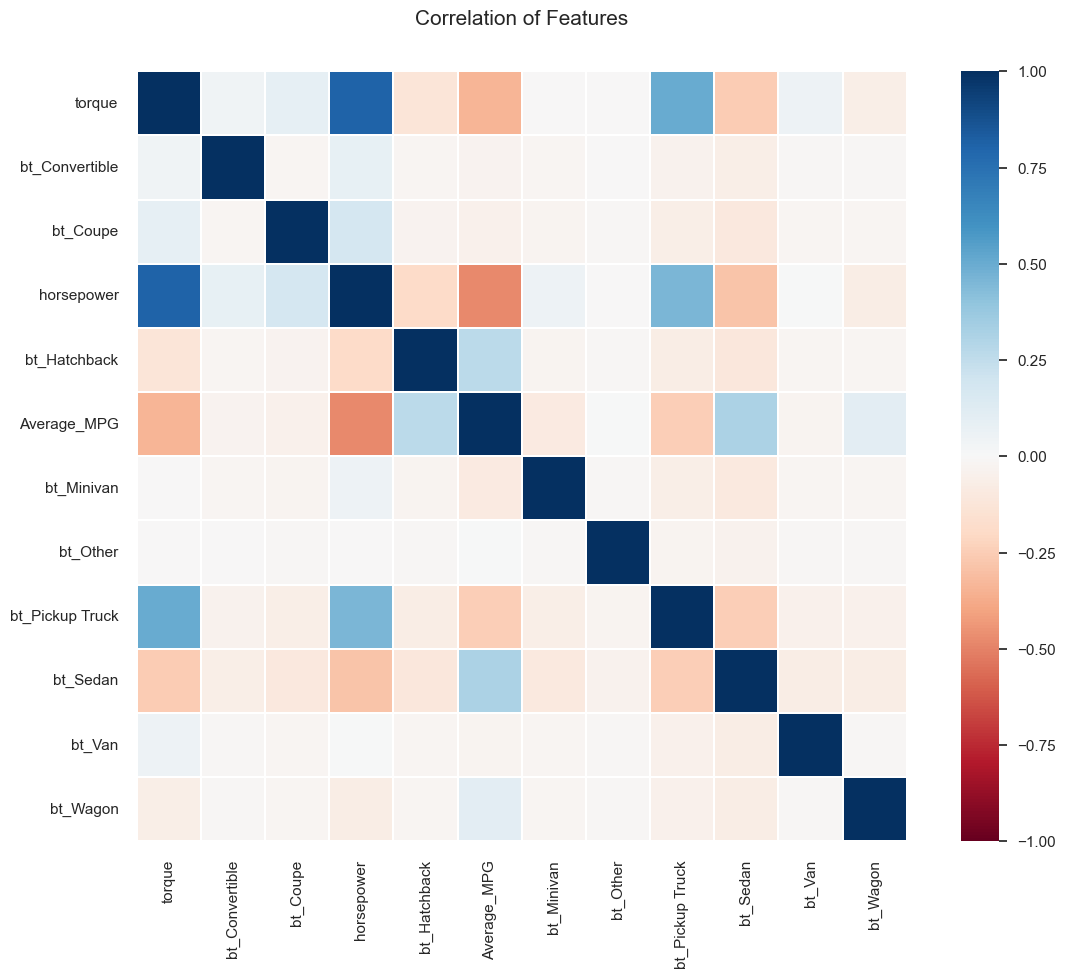

In [31]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,10))
plt.title('Correlation of Features', y = 1.05, size = 15)
sns.heatmap(df_corrMatrix, linewidth=0.1, vmax = 1.0, vmin = -1.0, square = True, cmap = colormap, linecolor = 'white', annot=False)

## Correlation Matrix Summary

We can see in our correlation matrix heatmap that specific bodytypes have a high correlation with torque and horsepower while others are almost nonexistent. Specifically there is a high positive correlation between pick-up truck, horsepower, and torque. There is also a high negative correlation between horsepower and Average MPG. Horsepower and torque also have an extremely high positive correlation. 

In [32]:
df_datadive.describe()

,days_on_market,franchise_dealer,horsepower,is_new,mileage,owner_count,Sale_Price,savings_amount,seller_rating,torque,...,td_8-Speed Automatic Overdrive,td_8-Speed CVT,td_8-Speed Dual Clutch,td_8-Speed Manual,td_9-Speed Automatic,td_9-Speed Automatic Overdrive,td_9-Speed Dual Clutch,td_Continuously Variable Transmission,td_Manual,td_Other
count,206239.000000,206239.000000,206239.000000,206239.000000,2.062390e+05,206239.000000,2.062390e+05,206239.000000,206239.000000,206239.000000,...,206239.000000,206239.000000,206239.000000,206239.000000,206239.000000,206239.000000,206239.000000,206239.000000,206239.000000,206239.000000
mean,72.268751,0.742842,245.386236,0.473194,3.356656e+04,0.817644,2.918536e+04,568.963460,4.175650,260.600386,...,0.004034,0.000005,0.001338,0.000058,0.038150,0.001106,0.000005,0.152600,0.007453,0.025272
std,105.494817,0.437068,88.537592,0.499282,2.247291e+05,1.070582,2.080288e+04,1157.984763,0.507993,106.288792,...,0.063387,0.002202,0.036558,0.007628,0.191559,0.033231,0.002202,0.359602,0.086006,0.156949
min,0.000000,0.000000,70.000000,0.000000,0.000000e+00,0.000000,3.869000e+02,0.000000,1.000000,68.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,0.000000,175.000000,0.000000,8.000000e+00,0.000000,1.740800e+04,0.000000,3.937500,181.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,1.000000,241.000000,0.000000,1.731200e+04,1.000000,2.508600e+04,0.000000,4.250000,258.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,77.000000,1.000000,295.000000,1.000000,4.330000e+04,1.000000,3.711550e+04,812.000000,4.504762,275.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1970.000000,1.000000,1001.000000,1.000000,9.999999e+07,12.000000,1.750000e+06,130021.000000,5.000000,935.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Filtering for outliers

In [33]:
df_datadive=df_datadive[df_datadive['Sale_Price']<75000]

In [34]:
df_datadive=df_datadive[df_datadive['year']>1940]

### Scatterplot after removing outliers

<AxesSubplot:xlabel='year', ylabel='Sale_Price'>

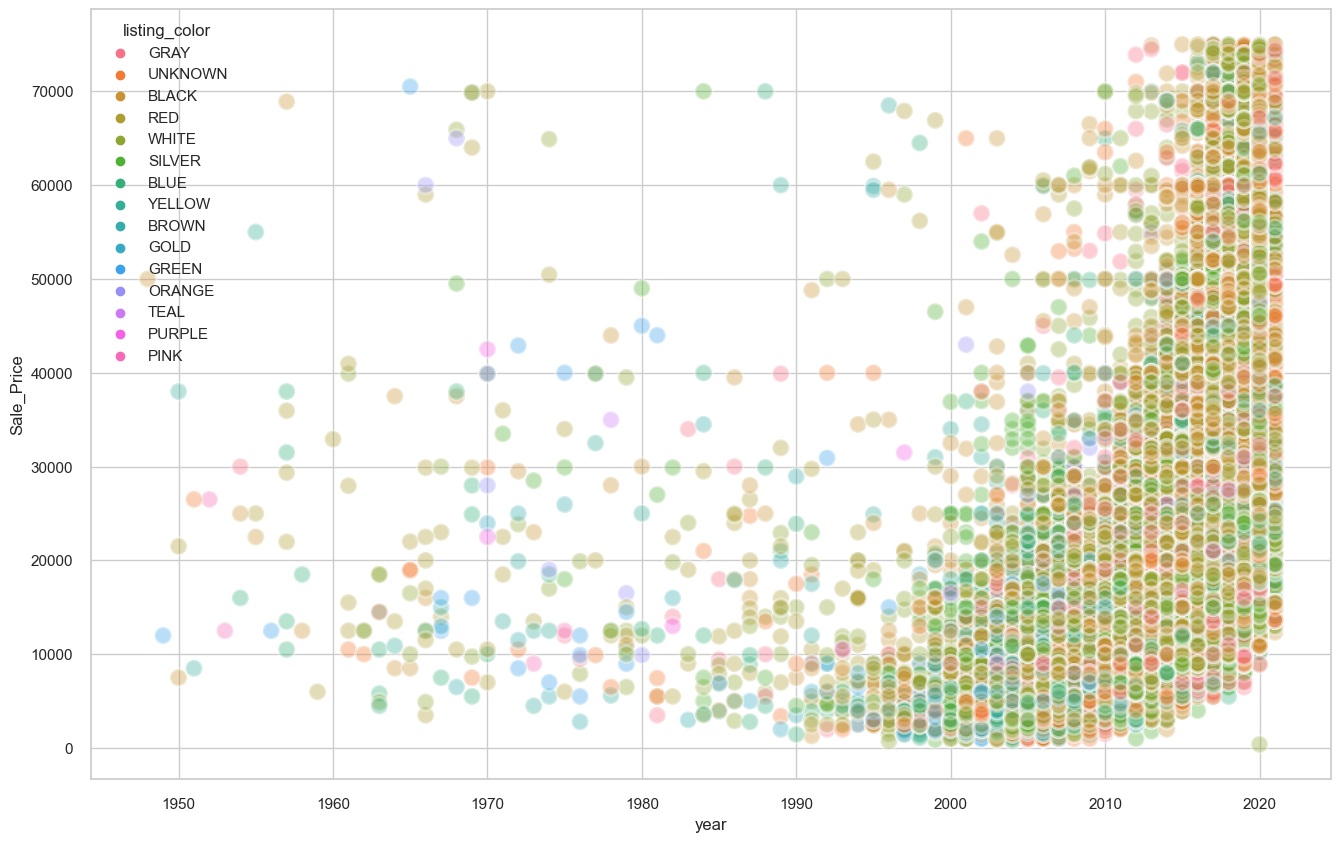

In [35]:
sns.set(style='whitegrid')
plt.figure(figsize=(16,10))
sns.scatterplot(y='Sale_Price', x = 'year', hue = 'listing_color', data = df_datadive, alpha = .35, s = 150, edgecolor='white', linewidth = 2)

### Regression after Removing Outliers

In [36]:
X2=df_datadive[[ 'days_on_market', 'horsepower','mileage', 'owner_count',  'savings_amount', 'seller_rating', 'torque', 'wheelbase', 'year', 'feature_count', 'Average_MPG', 'ec_2.0', 'ec_3.0','ec_5.0', 'ec_6.0', 'ec_8.0', 'ec_10.0', 'ec_12.0', 'ec_16.0', 'ec_Other', 'fd_True', 'fd_Unknown', 'ft_Biodiesel', 'ft_Compressed Natural Gas', 'ft_Diesel', 'ft_Electric', 'ft_Flex Fuel Vehicle', 'ft_Hybrid', 'ft_Other', 'ha_False', 'ha_True', 'lc_BLACK', 'lc_BLUE', 'lc_BROWN', 'lc_GOLD', 'lc_GRAY', 'lc_GREEN', 'lc_ORANGE', 'lc_PINK', 'lc_PURPLE', 'lc_RED', 'lc_SILVER', 'lc_TEAL', 'lc_UNKNOWN', 'lc_YELLOW', 'mk_AM General', 'mk_AMC', 'mk_Acura', 'mk_Alfa Romeo', 'mk_Aston Martin', 'mk_Audi', 'mk_BMW', 'mk_Bentley', 'mk_Bugatti', 'mk_Buick', 'mk_Cadillac', 'mk_Chevrolet', 'mk_Chrysler', 'mk_Datsun', 'mk_DeTomaso', 'mk_Dodge', 'mk_Edsel', 'mk_FIAT', 'mk_Ferrari', 'mk_Fisker', 'mk_Freightliner', 'mk_GMC', 'mk_Genesis', 'mk_Honda', 'mk_Hummer', 'mk_Hyundai', 'mk_INFINITI', 'mk_Isuzu', 'mk_Jaguar', 'mk_Jeep', 'mk_Karma', 'mk_Kia', 'mk_Lamborghini', 'mk_Land Rover', 'mk_Lexus', 'mk_Lincoln', 'mk_Lotus', 'mk_MG', 'mk_MINI', 'mk_Maserati', 'mk_Mazda', 'mk_McLaren', 'mk_Mercedes-Benz', 'mk_Mercury', 'mk_Mitsubishi', 'mk_Nash', 'mk_Nissan', 'mk_Oldsmobile', 'mk_Pininfarina', 'mk_Plymouth', 'mk_Pontiac', 'mk_Porsche', 'mk_RAM', 'mk_Rolls-Royce', 'mk_SRT', 'mk_Saab', 'mk_Saturn', 'mk_Scion', 'mk_Shelby', 'mk_Subaru', 'mk_Sunbeam', 'mk_Suzuki', 'mk_Tesla', 'mk_Toyota', 'mk_Triumph', 'mk_Volkswagen', 'mk_Volvo', 'mk_Willys', 'mk_smart', 'ms_2.0', 'ms_3.0', 'ms_4.0',  'ms_6.0', 'ms_7.0', 'ms_8.0', 'ms_9.0', 'ms_10.0', 'ms_12.0', 'ms_15.0', 'ms_Other', 's_True', 's_Unknown']]

y=df_datadive['Sale_Price']

In [37]:
X2 = sm.add_constant(X2)

reg3 = sm.OLS(y, X2).fit()

pred3= reg3.predict(X2)
resid3 = reg3.resid

reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     5981.
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:33:52   Log-Likelihood:            -2.0692e+06
No. Observations:              202004   AIC:                         4.139e+06
Df Residuals:                  201885   BIC:                         4.140e+06
Df Model:                         118                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -1.493e+06   8496.332   -175.666      0.000   -1.51e+06   -1.48e+06
days_on_market                1.9875      0.150     13.228      0.000       1.693       2.282
horsepower                   62.5154      0.504    124.073      0.000      61.528      63.503
mileage                      -0.0010   6.76e-05    -14.932      0.000      -0.001      -0.001
owner_count               -1928.9851     24.369    -79.156      0.000   -1976.749   -1881.222
savings_amount                0.0377      0.019      1.935      0.053      -0.000       0.076
seller_rating              1168.6780     30.618     38.169      0.000    1108.667    1228.689
torque                        8.9475      0.310     28.852      0.000       8.340       9.555
wheelbase                   156.3675      2.656     58.864      0.000     151.161     161.574
year                       1028.1538      5.906    174.092      0.000    1016.579    1039.729
feature_count               422.4701      4.831     87.450      0.000     413.001     431.939
Average_MPG                 -72.8791      3.487    -20.901      0.000     -79.713     -66.045
ec_2.0                       88.8872    823.289      0.108      0.914   -1524.739    1702.514
ec_3.0                    -1072.6708    129.222     -8.301      0.000   -1325.943    -819.398
ec_5.0                     -652.5266    323.347     -2.018      0.044   -1286.278     -18.775
ec_6.0                     -184.6439     59.851     -3.085      0.002    -301.950     -67.338
ec_8.0                      758.1056     96.525      7.854      0.000     568.920     947.292
ec_10.0                   -1153.2959   1138.959     -1.013      0.311   -3385.629    1079.037
ec_12.0                   -1288.7372   1672.939     -0.770      0.441   -4567.658    1990.183
ec_16.0                    2.898e-09   5.06e-11     57.284      0.000     2.8e-09       3e-09
ec_Other                   1.232e+04    852.519     14.449      0.000    1.06e+04     1.4e+04
fd_True                    -543.2232    179.920     -3.019      0.003    -895.862    -190.584
fd_Unknown                -2.958e+05   1704.274   -173.556      0.000   -2.99e+05   -2.92e+05
ft_Biodiesel               9743.3782    210.452     46.297      0.000    9330.898    1.02e+04
ft_Compressed Natural Gas -7738.2394   1964.505     -3.939      0.000   -1.16e+04   -3887.856
ft_Diesel                  7430.8850    153.928     48.275      0.000    7129.189    7732.581
ft_Electric               -1.255e+04    897.940    -13.980      0.000   -1.43e+04   -1.08e+04
ft_Flex Fuel Vehicle      -3410.7020     79.347    -42.985      0.000   -3566.220   -3255.184
ft_Hybrid                  1661.4739    112.884     14.718      0.000    1440.225    1882.723
ft_Other                  -9034.0819    854.307    -10.575      0.000   -1.

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = X.iloc[0:1000,:]

vif = pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['features']= X.columns
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

C:\Users\mrsmo\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mrsmo\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mrsmo\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
136,inf,ft_Other
165,inf,s_Unknown
127,inf,ec_Other
129,inf,fd_Unknown
138,inf,ha_True
133,inf,ft_Electric
137,inf,ha_False
2,12.8,horsepower
8,10.4,wheelbase
115,6.7,bt_Pickup Truck


In [39]:
X=df_datadive[['days_on_market', 'horsepower', 'mileage', 'owner_count', 'savings_amount', 'seller_rating', 'torque', 'wheelbase', 'year', 'feature_count', 'Average_MPG', 'mk_AM General', 'mk_AMC', 'mk_Acura', 'mk_Alfa Romeo', 'mk_Aston Martin', 'mk_Audi', 'mk_BMW', 'mk_Bentley', 'mk_Bugatti', 'mk_Buick', 'mk_Cadillac', 'mk_Chevrolet', 'mk_Chrysler', 'mk_Datsun', 'mk_DeTomaso', 'mk_Dodge', 'mk_Edsel', 'mk_FIAT', 'mk_Ferrari', 'mk_Fisker', 'mk_Freightliner', 'mk_GMC', 'mk_Genesis', 'mk_Honda', 'mk_Hummer', 'mk_Hyundai', 'mk_INFINITI', 'mk_Isuzu', 'mk_Jaguar', 'mk_Jeep', 'mk_Karma', 'mk_Kia', 'mk_Lamborghini', 'mk_Land Rover', 'mk_Lexus', 'mk_Lincoln', 'mk_Lotus', 'mk_MG', 'mk_MINI', 'mk_Maserati', 'mk_Mazda', 'mk_McLaren', 'mk_Mercedes-Benz', 'mk_Mercury', 'mk_Mitsubishi', 'mk_Nash', 'mk_Nissan', 'mk_Oldsmobile', 'mk_Pininfarina', 'mk_Plymouth', 'mk_Pontiac', 'mk_Porsche', 'mk_RAM', 'mk_Rolls-Royce', 'mk_SRT', 'mk_Saab', 'mk_Saturn', 'mk_Scion', 'mk_Shelby', 'mk_Subaru', 'mk_Sunbeam', 'mk_Suzuki', 'mk_Tesla', 'mk_Toyota', 'mk_Triumph', 'mk_Volkswagen', 'mk_Volvo', 'mk_Willys', 'mk_smart',  'c_Albuquerque', 'c_Arlington', 'c_Austin', 'c_Charlotte', 'c_Chicago', 'c_Cincinnati', 'c_Columbia', 'c_Columbus', 'c_Dallas', 'c_Denver', 'c_El Paso', 'c_Indianapolis', 'c_Jacksonville', 'c_Las Vegas', 'c_Louisville', 'c_Madison', 'c_Miami', 'c_Oklahoma City', 'c_Orlando', 'c_Phoenix', 'c_Raleigh', 'c_Richmond', 'c_San Antonio', 'c_San Jose', 'c_Scottsdale', 'c_Springfield', 'c_Stafford', 'c_Tampa', 'c_Tucson', 'bt_Convertible', 'bt_Coupe', 'bt_Hatchback', 'bt_Minivan', 'bt_Other', 'bt_Pickup Truck', 'bt_Sedan', 'bt_Van', 'bt_Wagon', 'ec_2.0', 'ec_3.0', 'ec_5.0', 'ec_6.0', 'ec_8.0', 'ec_10.0', 'ec_12.0', 'ec_16.0', 'ec_Other', 'fd_True', 'fd_Unknown', 'ft_Biodiesel', 'ft_Compressed Natural Gas', 'ft_Diesel', 'ft_Electric', 'ft_Flex Fuel Vehicle', 'ft_Hybrid', 'ft_Other', 'ha_False', 'ha_True', 'lc_BLACK', 'lc_BLUE', 'lc_BROWN', 'lc_GOLD', 'lc_GRAY', 'lc_GREEN', 'lc_ORANGE', 'lc_PINK', 'lc_PURPLE', 'lc_RED', 'lc_SILVER', 'lc_TEAL', 'lc_UNKNOWN', 'lc_YELLOW', 'ms_2.0', 'ms_3.0', 'ms_4.0', 'ms_6.0', 'ms_7.0', 'ms_8.0', 'ms_9.0', 'ms_10.0', 'ms_12.0', 'ms_15.0', 'ms_Other', 's_True', 's_Unknown', 'td_1-Speed Automatic', 'td_1-Speed CVT', 'td_1-Speed Dual Clutch', 'td_10-Speed Automatic', 'td_2-Speed Automatic', 'td_3-Speed Automatic', 'td_3-Speed Manual', 'td_4-Speed Automatic', 'td_4-Speed Automatic Overdrive', 'td_4-Speed Manual', 'td_5-Speed Automatic', 'td_5-Speed Automatic Overdrive', 'td_5-Speed Manual', 'td_5-Speed Manual Overdrive', 'td_6-Speed Automatic', 'td_6-Speed Automatic Overdrive', 'td_6-Speed CVT', 'td_6-Speed Dual Clutch', 'td_6-Speed Manual', 'td_6-Speed Manual Overdrive', 'td_7-Speed Automatic', 'td_7-Speed Automatic Overdrive', 'td_7-Speed CVT', 'td_7-Speed Dual Clutch', 'td_7-Speed Manual', 'td_8-Speed Automatic', 'td_8-Speed Automatic Overdrive', 'td_8-Speed CVT', 'td_8-Speed Dual Clutch', 'td_8-Speed Manual', 'td_9-Speed Automatic', 'td_9-Speed Automatic Overdrive', 'td_9-Speed Dual Clutch', 'td_Continuously Variable Transmission', 'td_Manual', 'td_Other']]

y= df_datadive['Sale_Price']

In [40]:
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()

pred= reg.predict(X)
resid = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     4054.
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:34:02   Log-Likelihood:            -2.0622e+06
No. Observations:              202004   AIC:                         4.125e+06
Df Residuals:                  201813   BIC:                         4.127e+06
Df Model:                         190                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                 -1.573e+06   8655.071   -181.720      0.000   -1.59e+06   -1.56e+06
days_on_market                            2.2789      0.146     15.595      0.000       1.992       2.565
horsepower                               58.5395      0.520    112.605      0.000      57.521      59.558
mileage                                  -0.0010   6.53e-05    -14.820      0.000      -0.001      -0.001
owner_count                           -1802.1414     23.682    -76.097      0.000   -1848.558   -1755.725
savings_amount                           -0.0280      0.019     -1.485      0.138      -0.065       0.009
seller_rating                          1061.7659     30.679     34.609      0.000    1001.636    1121.896
torque                                    8.4246      0.305     27.623      0.000       7.827       9.022
wheelbase                               156.9265      3.470     45.226      0.000     150.126     163.727
year                                   1084.1821      6.014    180.290      0.000    1072.396    1095.968
feature_count                           413.1601      4.722     87.492      0.000     403.905     422.416
Average_MPG                              -2.0973      4.344     -0.483      0.629     -10.611       6.417
mk_AM General                          4.243e+04   4713.842      9.001      0.000    3.32e+04    5.17e+04
mk_AMC                                 4.026e+04   6578.953      6.120      0.000    2.74e+04    5.32e+04
mk_Acura                               5854.0939    146.233     40.033      0.000    5567.481    6140.707
mk_Alfa Romeo                          5913.8331    295.596     20.006      0.000    5334.472    6493.194
mk_Aston Martin                        2.724e+04   2747.370      9.914      0.000    2.19e+04    3.26e+04
mk_Audi                                9939.2071    147.360     67.449      0.000    9650.386    1.02e+04
mk_BMW                                 9031.5458    109.902     82.178      0.000    8816.140    9246.952
mk_Bentley                              2.76e+04   1958.453     14.095      0.000    2.38e+04    3.14e+04
mk_Bugatti                            -8.895e-09   1.43e-10    -62.370      0.000   -9.17e-09   -8.62e-09
mk_Buick                               -602.4158    122.661     -4.911      0.000    -842.828    -362.004
mk_Cadillac                            5888.1526    135.998     43.296      0.000    5621.599    6154.706
mk_Chevrolet                           -806.3778     59.924    -13.457      0.000    -923.828    -688.928
mk_Chrysler                           -2387.3729    154.782    -15.424      0.000   -2690.742   -2084.003
mk_Datsun                              1.769e+04   6756.541      2.618      0.009    4445.272    3.09e+04
mk_DeToma

## Summary of Final Regression

 Our model is statistically significant to predicting our target variable. (p < 0.05)

r-squared = .792 


### Jointplot of Residuals for Final Regression

In [41]:
df_pred = pd.DataFrame(pred)
df_pred=df_pred.rename(columns = {0:'Sale Price Predicted'})
df_pred.head()

df_resid = pd.DataFrame(resid)
df_resid=df_resid.rename(columns = {0:'Residuals'})
df_resid.head()

df_reg_results = pd.concat([X, y, df_pred, df_resid], axis=1)
df_reg_results.head()

,const,days_on_market,horsepower,mileage,owner_count,savings_amount,seller_rating,torque,wheelbase,year,...,td_8-Speed Manual,td_9-Speed Automatic,td_9-Speed Automatic Overdrive,td_9-Speed Dual Clutch,td_Continuously Variable Transmission,td_Manual,td_Other,Sale_Price,Sale Price Predicted,Residuals
273335,1.0,66.0,241.0,194490.0,3.0,766.0,4.571429,258.0,114.57791,2008.0,...,0,0,0,0,0,0,0,13900.0,15153.835884,-1253.835884
129041,1.0,66.0,237.0,14.0,0.0,0.0,4.387097,405.0,116.00000,2020.0,...,0,0,0,0,0,0,0,43960.0,40542.206107,3417.793893
391889,1.0,92.0,290.0,30260.0,1.0,358.0,4.132075,255.0,112.80000,2017.0,...,0,0,0,0,0,0,0,27300.0,29058.625891,-1758.625891
190885,1.0,100.0,241.0,35843.0,1.0,870.0,3.471264,258.0,114.57791,2018.0,...,0,0,0,0,1,0,0,15198.0,26875.143448,-11677.143448
240480,1.0,9.0,98.0,2.0,0.0,0.0,3.764706,258.0,93.90000,2021.0,...,0,0,0,0,1,0,0,15495.0,18006.724352,-2511.724352


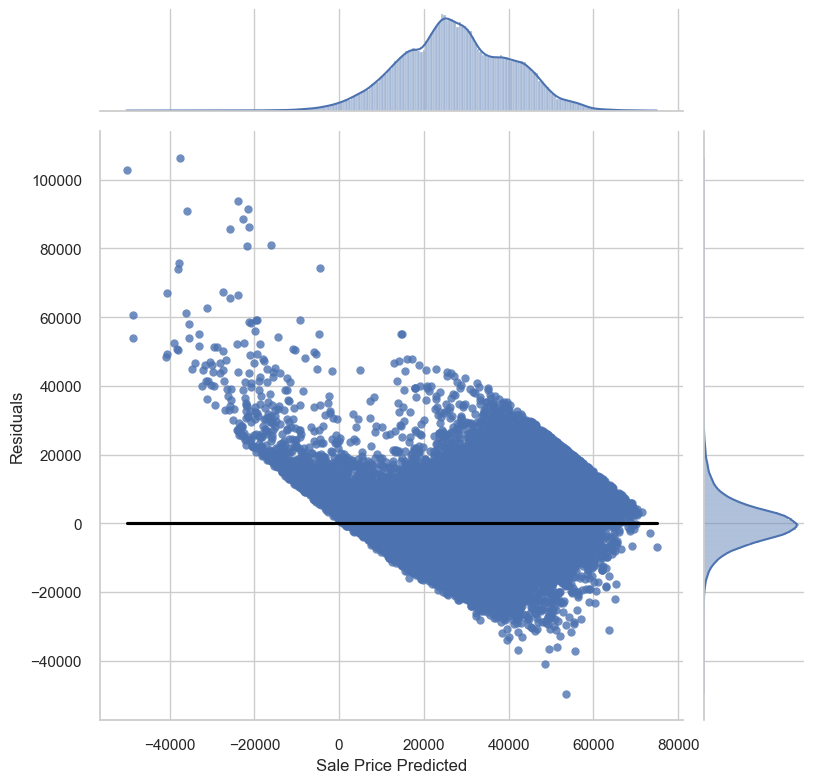

In [42]:
sns.jointplot(x='Sale Price Predicted', y='Residuals', data = df_reg_results, kind = "reg", ratio=5, height = 8, line_kws={'color': 'black'})